In [1]:
import pickle
import pandas as pd
import statsmodels.api as sm   # needs X intercept added for a valid R2
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

sns.set_style("darkgrid")
%pylab inline

/Users/sdutta/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('../Data/GenreDF.pkl', 'rb') as picklefile: 
    Genres_DF = pickle.load(picklefile)

In [3]:
Genres_DF

,log_Adj_World_Gross,MovieTitle,Franchise,genre,Release_Date,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,...,log_FranNum_X_WidRel,log_FranchiseNum,GenreGrp,Action,Comedy,Horror,Animation,Documentary,Drama,Sci-Fi
0,20.190273,300,300,Period Action,2007-03-09,1,5.868458e+08,8.398981e+07,3280.0,117.0,...,8.095599,0.000000,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.033549,3 Ninjas Kick Back,3Ninjas,Family Adventure,1994-05-06,2,2.497908e+07,4.253583e+07,2043.0,94.0,...,8.315322,0.693147,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.021578,A Haunted House,AHauntedHouse,Comedy,2013-01-11,1,6.709219e+07,2.799121e+06,2160.0,80.0,...,7.677864,0.000000,Comedy,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,16.934899,A Haunted House 2,AHauntedHouse,Horror Comedy,2014-04-18,2,2.263254e+07,4.268909e+06,2310.0,87.0,...,8.438150,0.693147,Comedy,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,18.579661,Kiss the Girls,AlexCross,Thriller,1997-10-03,1,1.172315e+08,5.229410e+07,2406.0,117.0,...,7.785721,0.000000,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,18.922488,Along Came a Spider,AlexCross,Thriller,2001-04-06,2,1.651704e+08,9.424031e+07,2573.0,103.0,...,8.545975,0.693147,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17.482264,Alex Cross,AlexCross,Crime Thriller,2012-10-19,3,3.912468e+07,3.865338e+07,2541.0,101.0,...,8.938925,1.098612,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19.459876,Alice Through the Looking Glass,AliceinWonderland,Family Adventure,2016-05-27,2,2.826941e+08,1.732179e+08,3763.0,112.0,...,8.926119,0.693147,Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20.396463,Alien,Alien,Sci-Fi Horror,1979-05-25,1,7.212256e+08,3.896016e+07,757.0,117.0,...,6.629363,0.000000,Horror,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,19.900619,Aliens,Alien,Sci-Fi Horror,1986-07-18,2,4.392677e+08,4.073584e+07,1454.0,137.0,...,7.975221,0.693147,Horror,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data Exploration

In [4]:
Genres_DF.describe()

,log_Adj_World_Gross,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Action,Comedy,Horror,Animation,Documentary,Drama,Sci-Fi
count,586.000000,586.000000,5.860000e+02,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,19.357561,2.679181,4.382164e+08,9.212944e+07,2936.174061,109.660410,17.810661,8.643453,0.772216,0.315700,0.240614,0.182594,0.092150,0.001706,0.080205,0.087031
std,1.256623,1.854395,4.174808e+08,7.973195e+07,1004.048271,19.651903,1.305401,1.018542,0.647812,0.465191,0.427822,0.386663,0.289485,0.041310,0.271842,0.282121
min,9.024011,1.000000,8.300000e+03,1.503121e+04,1.000000,63.000000,9.617884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.614066,1.000000,1.213351e+08,3.024343e+07,2388.250000,94.000000,17.224789,8.064951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.554722,2.000000,3.108193e+08,6.691622e+07,3180.500000,106.000000,18.018951,8.797397,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.268680,3.000000,6.347114e+08,1.418138e+08,3702.500000,122.000000,18.770024,9.324381,1.098612,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.875781,10.000000,3.166146e+09,6.786261e+08,4468.000000,200.000000,20.335581,10.635134,2.302585,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
Genres_DF.corr()

,log_Adj_World_Gross,FranchiseNum,Adj_World_Gross,Adj_Budget,Widest_Release,Run_Time,log_Adj_Budget,log_FranNum_X_WidRel,log_FranchiseNum,Action,Comedy,Horror,Animation,Documentary,Drama,Sci-Fi
log_Adj_World_Gross,1.000000,0.074957,0.785350,0.646758,0.577611,0.479382,0.676946,0.406369,0.038649,0.212333,-0.257747,-0.202781,0.159606,-0.041842,0.004825,0.156371
FranchiseNum,0.074957,1.000000,0.104327,0.232420,0.281701,0.176987,0.212600,0.744446,0.945121,0.034383,-0.148164,0.046077,-0.069022,-0.037470,0.030785,0.151484
Adj_World_Gross,0.785350,0.104327,1.000000,0.686512,0.422208,0.558889,0.557692,0.225778,0.059374,0.134593,-0.265329,-0.219275,0.129706,-0.036336,0.146344,0.212172
Adj_Budget,0.646758,0.232420,0.686512,1.000000,0.554103,0.557309,0.783893,0.385088,0.214206,0.308641,-0.309762,-0.315219,0.085185,-0.047110,0.057875,0.256568
Widest_Release,0.577611,0.281701,0.422208,0.554103,1.000000,0.254323,0.576697,0.717731,0.293161,0.184999,-0.197472,-0.239354,0.248195,-0.096817,0.051511,0.032329
Run_Time,0.479382,0.176987,0.558889,0.557309,0.254323,1.000000,0.472876,0.196369,0.135496,0.305689,-0.260678,-0.223985,-0.285053,-0.020342,0.292449,0.211915
log_Adj_Budget,0.676946,0.212600,0.557692,0.783893,0.576697,0.472876,1.000000,0.479165,0.221301,0.298056,-0.229705,-0.346453,0.139451,-0.116960,0.011993,0.194184
log_FranNum_X_WidRel,0.406369,0.744446,0.225778,0.385088,0.717731,0.196369,0.479165,1.000000,0.791859,0.110130,-0.173502,-0.056438,0.063811,-0.092159,0.008300,0.098885
log_FranchiseNum,0.038649,0.945121,0.059374,0.214206,0.293161,0.135496,0.221301,0.791859,1.000000,0.038067,-0.131738,0.045430,-0.066432,-0.049327,0.039732,0.111844
Action,0.212333,0.034383,0.134593,0.308641,0.184999,0.305689,0.298056,0.110130,0.038067,1.000000,-0.382334,-0.321024,-0.216399,-0.028082,-0.200571,-0.209711


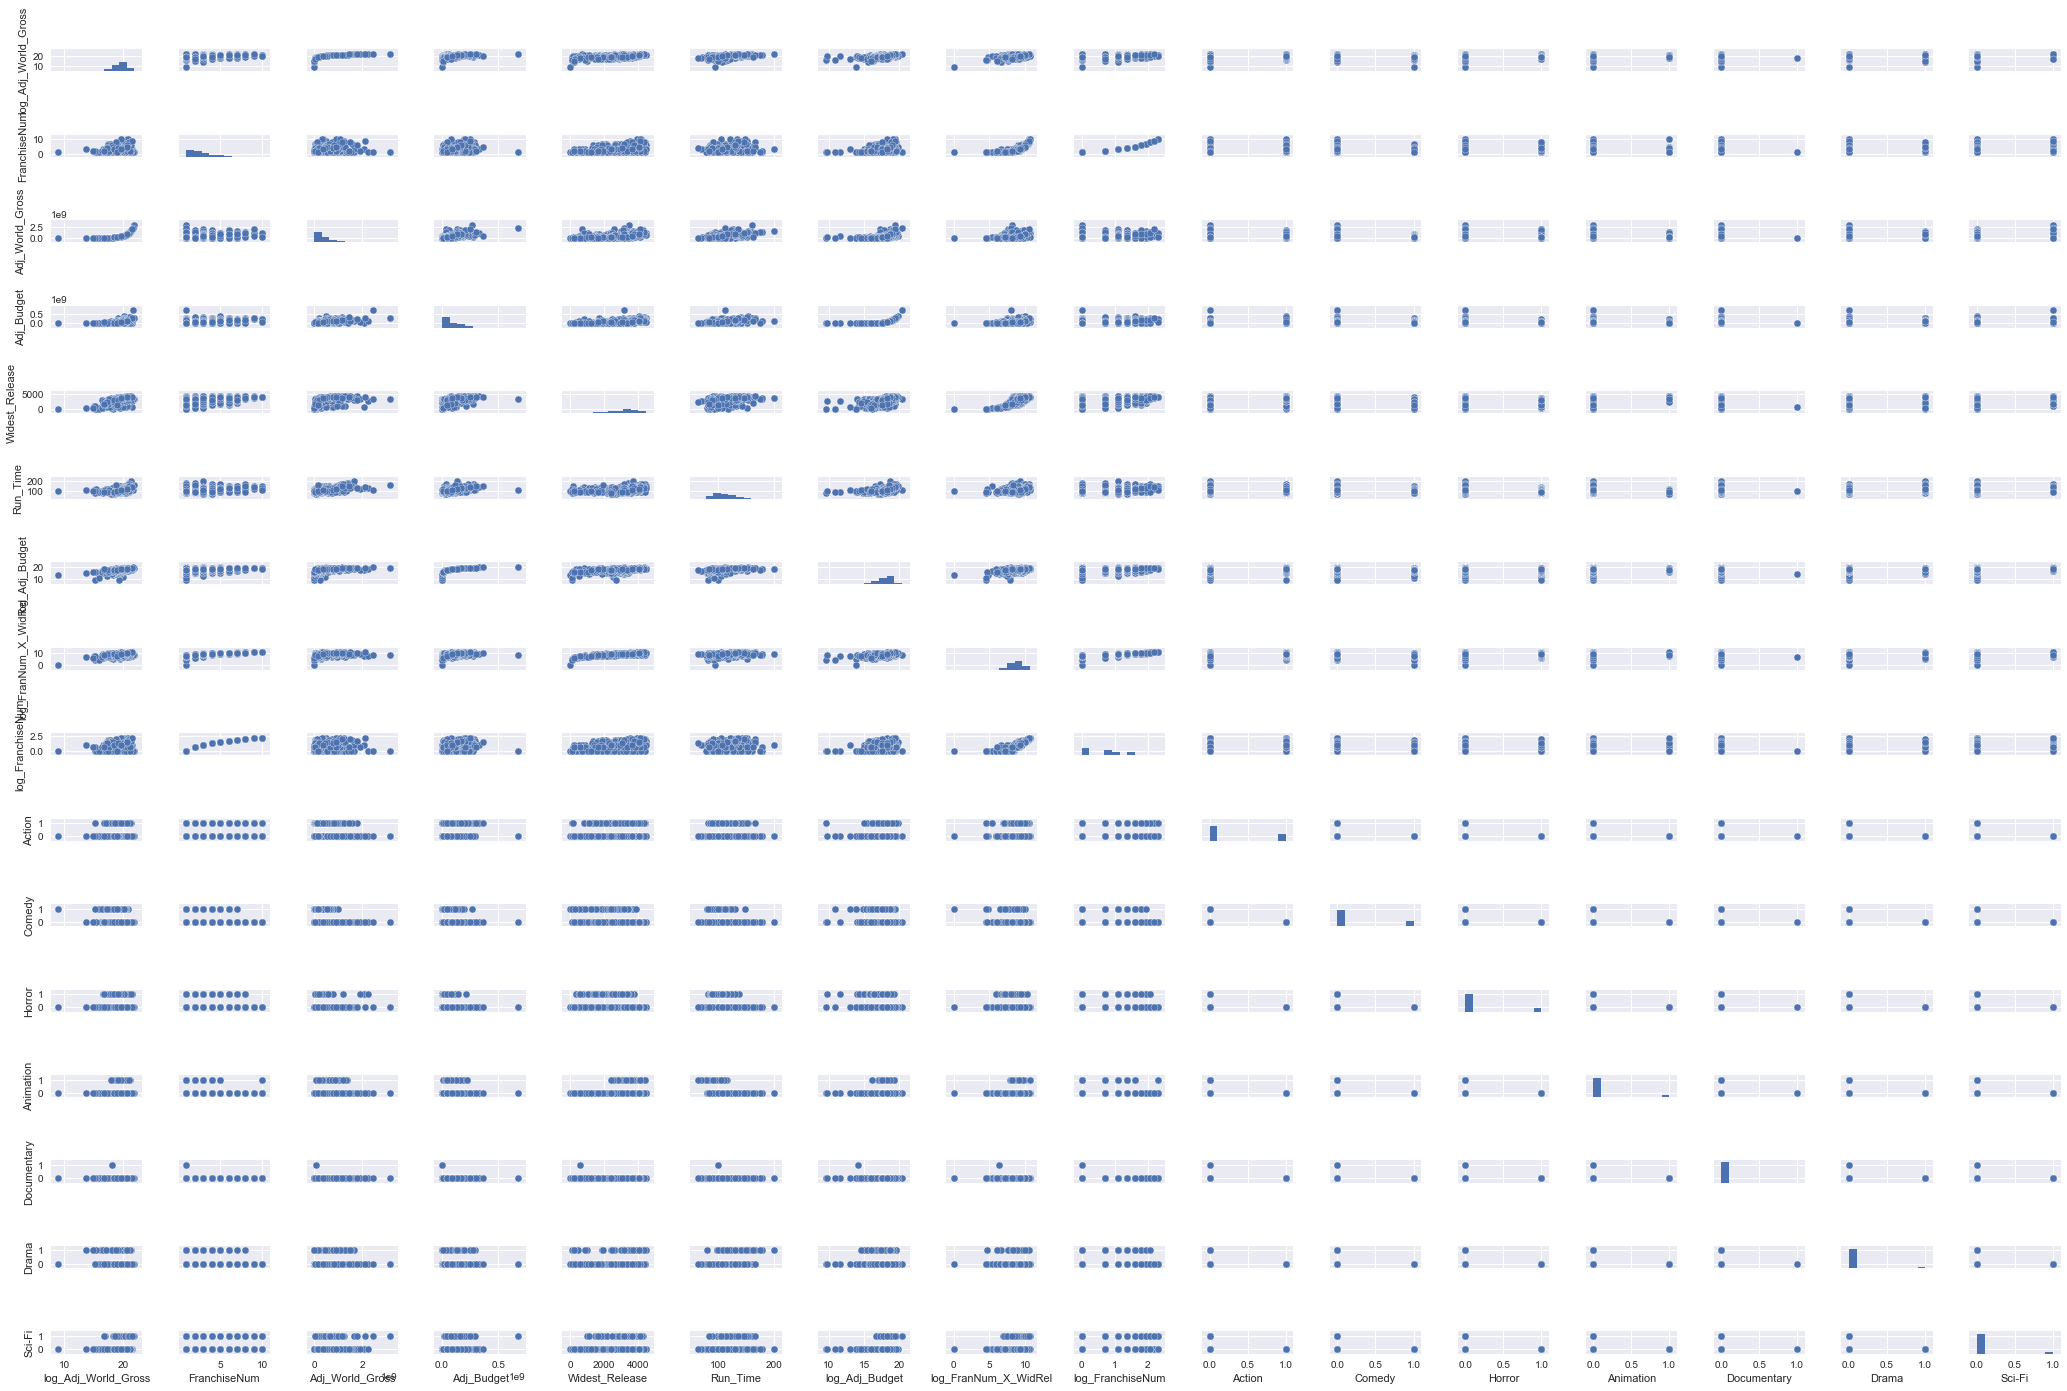

In [6]:
sns.pairplot(Genres_DF, size = 1.2, aspect=1.5)

In [7]:
Genres_DF.columns

Index(['log_Adj_World_Gross', 'MovieTitle', 'Franchise', 'genre',
       'Release_Date', 'FranchiseNum', 'Adj_World_Gross', 'Adj_Budget',
       'Widest_Release', 'Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'GenreGrp', 'Action', 'Comedy', 'Horror',
       'Animation', 'Documentary', 'Drama', 'Sci-Fi'],
      dtype='object')

In [8]:
Genres_DF['Sci_Fi'] =Genres_DF['Sci-Fi']
del Genres_DF['Sci-Fi']

### Regression using statsmodels.formula.api as smf without 7 Movie Genres
Number slightly different here than the RegressionProject file as some data was cleaned up 

In [9]:
lsm = smf.ols('log_Adj_World_Gross ~ Run_Time +\
               log_Adj_Budget +log_FranNum_X_WidRel+log_FranchiseNum' , data=Genres_DF)

fit1 = lsm.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_Adj_World_Gross   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.613
Method:                  Least Squares   F-statistic:                     232.6
Date:                 Tue, 10 Oct 2017   Prob (F-statistic):          4.27e-119
Time:                         07:53:27   Log-Likelihood:                -684.72
No. Observations:                  586   AIC:                             1379.
Df Residuals:                      581   BIC:                             1401.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.1306      0.490     10.481      0.000       4.169       6.092
Run_Time                 0.0162      0.002      8.608      0.000       0.012       0.020
log_Adj_Budget           0.3674      0.033     11.110      0.000       0.302       0.432
log_FranNum_X_WidRel     0.7847      0.061     12.903      0.000       0.665       0.904
log_FranchiseNum        -1.1324      0.086    -13.159      0.000      -1.301      -0.963
==============================================================================
Omnibus:                       26.313   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.784
Skew:                           0.008   Prob(JB):                     5.76e-17
Kurtosis:                       4.750   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression with the 7 movies genres

Leaving out Documentary as it has only 1 movie

In [10]:
lsm = smf.ols('log_Adj_World_Gross ~ Run_Time +\
               log_Adj_Budget +log_FranNum_X_WidRel+\
               log_FranchiseNum +Horror+Action+ Comedy+\
               Animation+  Drama+ Sci_Fi ' , data=Genres_DF)

fit2 = lsm.fit()

fit2.summary() #

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_Adj_World_Gross   R-squared:                       0.639
Model:                             OLS   Adj. R-squared:                  0.633
Method:                  Least Squares   F-statistic:                     101.7
Date:                 Tue, 10 Oct 2017   Prob (F-statistic):          3.39e-120
Time:                         07:53:27   Log-Likelihood:                -666.45
No. Observations:                  586   AIC:                             1355.
Df Residuals:                      575   BIC:                             1403.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3980      0.881      7.265      0.000       4.668       8.128
Run_Time                 0.0208      0.002      9.435      0.000       0.016       0.025
log_Adj_Budget           0.3377      0.035      9.517      0.000       0.268       0.407
log_FranNum_X_WidRel     0.7598      0.060     12.720      0.000       0.642       0.877
log_FranchiseNum        -1.1013      0.085    -12.941      0.000      -1.268      -0.934
Horror                  -0.9108      0.771     -1.182      0.238      -2.425       0.603
Action                  -1.1188      0.774     -1.446      0.149      -2.639       0.401
Comedy                  -1.1839      0.771     -1.535      0.125      -2.698       0.331
Animation               -0.5516      0.782     -0.705      0.481      -2.088       0.985
Drama                   -1.3760      0.778     -1.769      0.077      -2.903       0.151
Sci_Fi                  -0.9595      0.780     -1.230      0.219      -2.492       0.573
==============================================================================
Omnibus:                       22.539   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.348
Skew:                           0.024   Prob(JB):                     3.52e-13
Kurtosis:                       4.532   Cond. No.                     7.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:** None of the Genres are significant

In [11]:
fit2.save('../Data/GenreDF_OLS_fit2.pkl')

# Regularization & Cross Validation

In [12]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import train_test_split

/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Method 1

In [13]:
X = Genres_DF.loc[:,['Run_Time',\
               'log_Adj_Budget' ,'log_FranNum_X_WidRel',\
               'log_FranchiseNum','Horror', 'Action','Comedy',\
               'Animation','Drama','Sci_Fi'] ]

y = Genres_DF.loc[:,'log_Adj_World_Gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X.columns

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Horror', 'Action', 'Comedy', 'Animation', 'Drama',
       'Sci_Fi'],
      dtype='object')

In [15]:
# Lasso Coefficients Plot
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((0, 9))

0.01 [ 0.00695971  0.46994558  0.01874291 -0.          0.          0.         -0.
  0.         -0.          0.        ] 10.0191238722
0.001 [ 0.0199761   0.37494975  0.6915786  -1.00498672  0.20686747 -0.
 -0.09323697  0.454711   -0.1751208   0.        ] 5.20784853559
0.0001 [ 0.02200631  0.36405081  0.77822076 -1.14428151  0.30043099 -0.
 -0.08082137  0.54198299 -0.25078947  0.05025846] 4.51294979427
0 [ 0.02222655  0.36286223  0.7879319  -1.15998172  0.26973425 -0.04178955
 -0.12059386  0.51042427 -0.30019904  0.01749601] 4.47648903374


/Users/sdutta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


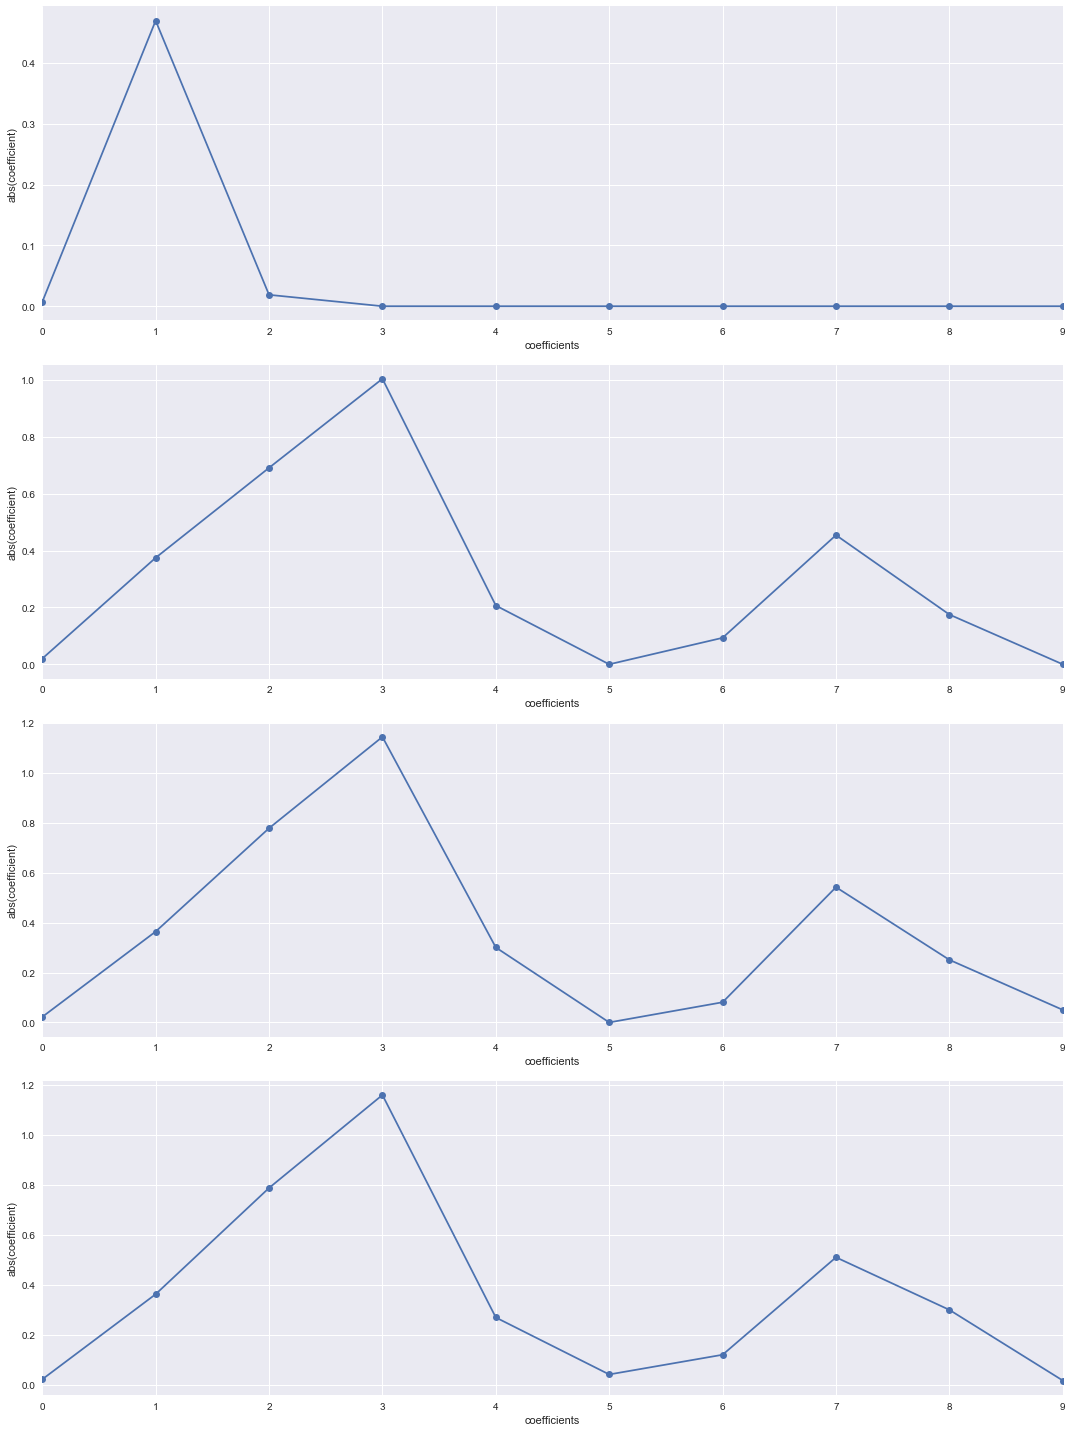

In [16]:
# Create only 2 plot rows, only trying 2 alphas
fig, ax_rows = plt.subplots(4, figsize=(15, 20))

# Plot the results next to the coefficient values for each of hte 2 alphas

alphas = [ 1e-2,1e-3,1e-4, 0] 
for alpha, ax_row in zip(alphas, ax_rows):
    lasso = Lasso(alpha=alpha,normalize=True)
    lasso.fit(X_train, y_train)
    print(lasso.alpha,lasso.coef_, lasso.intercept_)
    plot_coefficients(lasso,ax_row, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()


## Method 2

In [17]:
names = X.columns
names

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Horror', 'Action', 'Comedy', 'Animation', 'Drama',
       'Sci_Fi'],
      dtype='object')

In [18]:
# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()

    # Create a column of feature names
    df['Feature Name'] = names

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        # Normalize features as the scales vary for each feature
        lasso = Lasso(alpha=alpha, normalize=True)

        # Fit the lasso regression
        lasso.fit(X_train, y_train)


        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        #Returns the coefficient of determination R^2 of the prediction.
        print(lasso.score(X_test,y_test))  
        

    # Return the datafram    
    return df

In [19]:
lasso([0.01,.001, .0001, 0])   # Lasso r2 scores below for the different alphas

0.479487302822
0.588126421086
0.578093896844
0.577045559477


/Users/sdutta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 0.010000,Alpha = 0.001000,Alpha = 0.000100,Alpha = 0.000000
0,Run_Time,0.006960,0.019976,0.022006,0.022227
1,log_Adj_Budget,0.469946,0.374950,0.364051,0.362862
2,log_FranNum_X_WidRel,0.018743,0.691579,0.778221,0.787932
3,log_FranchiseNum,-0.000000,-1.004987,-1.144282,-1.159982
4,Horror,0.000000,0.206867,0.300431,0.269734
5,Action,0.000000,-0.000000,-0.000000,-0.041790
6,Comedy,-0.000000,-0.093237,-0.080821,-0.120594
7,Animation,0.000000,0.454711,0.541983,0.510424
8,Drama,-0.000000,-0.175121,-0.250789,-0.300199
9,Sci_Fi,0.000000,0.000000,0.050258,0.017496


### Method 3 LassoCV

In [20]:
from sklearn.linear_model import LassoCV

In [21]:
Genres_DF.GenreGrp.value_counts()

Action         185
Comedy         141
Horror         107
Animation       54
Sci-Fi          51
Drama           47
Documentary      1
Name: GenreGrp, dtype: int64

In [22]:
X.columns

Index(['Run_Time', 'log_Adj_Budget', 'log_FranNum_X_WidRel',
       'log_FranchiseNum', 'Horror', 'Action', 'Comedy', 'Animation', 'Drama',
       'Sci_Fi'],
      dtype='object')

In [23]:
# Another way to do Lasso with CV. This method chooses the best alpha to conduct CV
lcv = LassoCV(alphas=(0.01,.001, .0001, 0), cv=10,normalize=True )
lcv.fit(X,y)  # No need to split the data as LassoCV does the splitting on its own for CV
print(lcv.score(X,y))
print(lcv.alpha_)    # The alpha or amount of penalization choosen by CV 
print(lcv.coef_)
print(lcv.intercept_)

/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.638848303535
0.0
[ 0.02076532  0.33766449  0.75971888 -1.10129986 -0.89585706 -1.1037601
 -1.16899238 -0.53657626 -1.36110856 -0.94447275]
6.38436865036


/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1211: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [24]:
Genres_DF.to_pickle('../Data/Genre_DF.pkl')

In [25]:
X.to_pickle('../Data/GenreDF_X.pkl')

In [26]:
y.to_pickle('../Data/GenreDF_y.pkl')

In [27]:
from sklearn.externals import joblib
joblib.dump(lcv, '../Data/lcvGenre_sk_model.pkl')

['../Data/lcvGenre_sk_model.pkl']